In [1]:
import numpy as np
import pandas as pd
import torch
import pickle

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
#solved chinese display in matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams["font.family"] = "DFKai-SB"
rcParams['axes.unicode_minus'] = False

from Model import EncoderOneLayer
from ArticlesRep import MeanSimilarityoneindustry,MeanSimilaritytwoindustry
def IQR(array):
    Q3,Q1=np.percentile(array,[75,25])
    return Q3-Q1

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Load model & trainset & testset & dict_guid_onehot

In [2]:
model=EncoderOneLayer(20000,100)
model.load_state_dict(torch.load("EncoderStat.pt",map_location='cpu'))
model.eval()
for p in model.parameters():
    p.requires_grad_(False)
with open("dict_train_industry_guid.p","rb") as f:
    dict_train_industry_guid=pickle.load(f)
with open("dict_test_industry_guid.p","rb") as f:
    dict_test_industry_guid=pickle.load(f)
with open("D:4.AutoencoderForArticle.Mid-Industry/dict_guid_sparsebow_20000_single.v05.p","rb") as f:
    dict_guid_sparsebow_20000_single=pickle.load(f)

#### Testset 

In [3]:
li=[]
model=model
dict_collect_industry=dict_test_industry_guid
bow=dict_guid_sparsebow_20000_single
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    if len(array1)!=0:
        array1=model(torch.from_numpy(array1)).numpy()
        for j in dict_collect_industry:
                array2=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[j]],dtype=np.float32).squeeze()
                if len(array2)!=0:
                    array2=model(torch.from_numpy(array2)).numpy()
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

光碟片 光碟片 0.56332576
光碟片 通訊設備 0.020284016
光碟片 被動元件 0.041419197
光碟片 水泥 0.09332823
光碟片 條鋼 -0.04938449
光碟片 成衣 -0.0042751958
光碟片 水資源 -0.06163683
光碟片 通訊服務 -0.0420892
光碟片 電線電纜 0.043913133
光碟片 電子零件元件 0.03699872
光碟片 面板業 0.10326899
光碟片 IC封裝測試 0.0056649717
光碟片 不鏽鋼 -0.03206996
光碟片 橡膠工業 0.050266307
光碟片 食品加工 -0.05275337
光碟片 車輛整車 -0.08710717
光碟片 石化業 -0.047856603
光碟片 IC製造 -0.04757336
光碟片 設備儀器廠商 0.04376646
光碟片 大宗物資 -0.10664858
光碟片 分離式元件 0.03406886
光碟片 週邊產品 0.1688455
光碟片 運動產業 0.033572216
光碟片 合金鋼 0.040807117
光碟片 金融業 -0.038355246
光碟片 礦石開採 -0.10739741
光碟片 紡織中游 -0.00412386
光碟片 電力 -0.038435176
光碟片 太陽能 0.06641922
光碟片 光通訊 -0.029284012
光碟片 顯示器 0.08933056
光碟片 基礎建設營運 -0.045880154
光碟片 軟體業 0.0545915
光碟片 休閒娛樂 0.02085621
光碟片 線材、盤元 -0.016546156
光碟片 醫藥產業 -0.042815994
光碟片 醫療器材通路 -0.04847039
光碟片 生物科技 -0.013504809
光碟片 印刷電路板相關 0.116007224
光碟片 航天軍工 0.08124696
光碟片 服務業 -0.09145362
光碟片 運輸事業 0.0101860585
光碟片 遊戲產業 0.078491956
光碟片 家電 0.09635396
光碟片 建材 0.031686783
光碟片 旅館、餐飲 7.429392e-05
光碟片 營造工程 -0.0013219555
光碟片 化學工業 0.020366643
光

條鋼 時尚產業 -0.049027916
條鋼 機械 -0.04013007
條鋼 石油及天然氣 0.0007481961
條鋼 電聲產品 -0.018295214
條鋼 消費性電子產品 -0.0038663156
條鋼 造紙業 -0.0119989235
條鋼 農林漁牧 -0.03610991
條鋼 其他公用事業 0.053732205
條鋼 電子其他 0.00038113992
條鋼 數位相機 -0.017093856
條鋼 電腦系統業 -0.07508132
條鋼 電力設備 -0.04977605
條鋼 非鐵金屬 -0.07484459
條鋼 IC設計 -0.059696663
成衣 光碟片 -0.0042751958
成衣 通訊設備 -0.081129946
成衣 被動元件 -0.06378322
成衣 水泥 -0.016104018
成衣 條鋼 -0.07114144
成衣 成衣 0.48155203
成衣 水資源 -0.004807488
成衣 通訊服務 -0.081464164
成衣 電線電纜 0.033611547
成衣 電子零件元件 -0.029931158
成衣 面板業 -0.015040328
成衣 IC封裝測試 -0.06317678
成衣 不鏽鋼 0.03083097
成衣 橡膠工業 0.061881773
成衣 食品加工 -0.0028033215
成衣 車輛整車 -0.016221132
成衣 石化業 0.10753651
成衣 IC製造 -0.06780065
成衣 設備儀器廠商 0.024532303
成衣 大宗物資 -0.05765446
成衣 分離式元件 -0.0014753741
成衣 週邊產品 -0.030136446
成衣 運動產業 0.25676465
成衣 合金鋼 0.021708662
成衣 金融業 0.009068342
成衣 礦石開採 0.015257074
成衣 紡織中游 0.2332809
成衣 電力 -0.03246666
成衣 太陽能 -0.0067001483
成衣 光通訊 -0.014735093
成衣 顯示器 0.0195733
成衣 基礎建設營運 -0.04326736
成衣 軟體業 -0.06568417
成衣 休閒娛樂 0.0077706208
成衣 線材、盤元 0.026741786
成衣 

電子零件元件 遊戲產業 -0.002791876
電子零件元件 家電 0.05564855
電子零件元件 建材 -0.052626878
電子零件元件 旅館、餐飲 -0.078449495
電子零件元件 營造工程 -0.1007758
電子零件元件 化學工業 0.0024037464
電子零件元件 電子通路 0.25196123
電子零件元件 封測服務與材料 0.091161326
電子零件元件 汽機車零組件 0.103729114
電子零件元件 輔助與彌補用醫材 -0.031299207
電子零件元件 LED 0.030497067
電子零件元件 手機零組件 0.20137534
電子零件元件 貴金屬 -0.024558512
電子零件元件 飲料相關 -0.041593734
電子零件元件 化纖原料 0.039469484
電子零件元件 流通業 -0.10574763
電子零件元件 地產 -0.08753995
電子零件元件 家居用品 0.04077366
電子零件元件 面板零組件 -0.0019022514
電子零件元件 手機 0.033960413
電子零件元件 Internet相關 -0.049379837
電子零件元件 板鋼 -0.08225362
電子零件元件 傳產其他 0.03030801
電子零件元件 傳播事業 0.00036496486
電子零件元件 時尚產業 0.030867789
電子零件元件 機械 0.07473448
電子零件元件 石油及天然氣 -0.06020779
電子零件元件 電聲產品 -0.03745836
電子零件元件 消費性電子產品 0.11345189
電子零件元件 造紙業 -0.0980342
電子零件元件 農林漁牧 -0.081349455
電子零件元件 其他公用事業 -0.08284687
電子零件元件 電子其他 0.044235114
電子零件元件 數位相機 0.010681724
電子零件元件 電腦系統業 0.30899745
電子零件元件 電力設備 0.11054281
電子零件元件 非鐵金屬 -0.04461784
電子零件元件 IC設計 0.20496526
面板業 光碟片 0.10326899
面板業 通訊設備 -0.006193105
面板業 被動元件 0.081218004
面板業 水泥 -0.05180

食品加工 水資源 -0.0076034437
食品加工 通訊服務 -0.041463774
食品加工 電線電纜 0.029477928
食品加工 電子零件元件 -0.025377747
食品加工 面板業 0.016268056
食品加工 IC封裝測試 -0.031407643
食品加工 不鏽鋼 -0.1052497
食品加工 橡膠工業 -0.07518058
食品加工 食品加工 0.37604368
食品加工 車輛整車 -0.007738913
食品加工 石化業 -0.012811422
食品加工 IC製造 -0.05424078
食品加工 設備儀器廠商 -0.021795722
食品加工 大宗物資 0.22341059
食品加工 分離式元件 -0.05225837
食品加工 週邊產品 -0.052726865
食品加工 運動產業 0.042146605
食品加工 合金鋼 -0.098081626
食品加工 金融業 -0.009596917
食品加工 礦石開採 -0.07775118
食品加工 紡織中游 0.02271354
食品加工 電力 0.022243228
食品加工 太陽能 0.010488018
食品加工 光通訊 -0.025464892
食品加工 顯示器 -0.023776595
食品加工 基礎建設營運 0.039907493
食品加工 軟體業 -0.0029334647
食品加工 休閒娛樂 -0.023668362
食品加工 線材、盤元 -0.058183208
食品加工 醫藥產業 0.08715571
食品加工 醫療器材通路 0.032462522
食品加工 生物科技 0.08551853
食品加工 印刷電路板相關 0.0018067138
食品加工 航天軍工 -0.048805803
食品加工 服務業 -0.0064432127
食品加工 運輸事業 -0.03307138
食品加工 遊戲產業 0.019052075
食品加工 家電 0.02489069
食品加工 建材 0.0068428842
食品加工 旅館、餐飲 0.0389619
食品加工 營造工程 -0.031156931
食品加工 化學工業 0.026489384
食品加工 電子通路 -0.0042666458
食品加工 封測服務與材料 -0.022194834
食品加工 汽機車零組件 -

設備儀器廠商 輔助與彌補用醫材 -0.0911943
設備儀器廠商 LED 0.018379198
設備儀器廠商 手機零組件 0.037695684
設備儀器廠商 貴金屬 -0.12138966
設備儀器廠商 飲料相關 -0.0077796914
設備儀器廠商 化纖原料 -0.03989597
設備儀器廠商 流通業 -0.09840543
設備儀器廠商 地產 -0.027118783
設備儀器廠商 家居用品 -0.00688801
設備儀器廠商 面板零組件 0.16179727
設備儀器廠商 手機 -0.06087071
設備儀器廠商 Internet相關 -0.038257033
設備儀器廠商 板鋼 -0.13841018
設備儀器廠商 傳產其他 0.053922858
設備儀器廠商 傳播事業 0.011824348
設備儀器廠商 時尚產業 0.0060514063
設備儀器廠商 機械 0.16474974
設備儀器廠商 石油及天然氣 -0.08192514
設備儀器廠商 電聲產品 0.05714008
設備儀器廠商 消費性電子產品 0.013480854
設備儀器廠商 造紙業 -0.09530758
設備儀器廠商 農林漁牧 -0.11908421
設備儀器廠商 其他公用事業 -0.115091614
設備儀器廠商 電子其他 0.30170086
設備儀器廠商 數位相機 0.06864053
設備儀器廠商 電腦系統業 0.030803395
設備儀器廠商 電力設備 0.092690565
設備儀器廠商 非鐵金屬 -0.074046634
設備儀器廠商 IC設計 0.12003967
大宗物資 光碟片 -0.106648564
大宗物資 通訊設備 -0.07436242
大宗物資 被動元件 -0.059111092
大宗物資 水泥 -0.028807664
大宗物資 條鋼 0.019719584
大宗物資 成衣 -0.057654455
大宗物資 水資源 0.022221392
大宗物資 通訊服務 0.015209916
大宗物資 電線電纜 -0.04808554
大宗物資 電子零件元件 -0.08330226
大宗物資 面板業 -0.04881078
大宗物資 IC封裝測試 -0.09813011
大宗物資 不鏽鋼 -0.11427146
大宗物資 橡膠工業 -0

合金鋼 食品加工 -0.09808163
合金鋼 車輛整車 -0.045413777
合金鋼 石化業 -0.064250864
合金鋼 IC製造 -0.06057284
合金鋼 設備儀器廠商 -0.005212175
合金鋼 大宗物資 -0.050760295
合金鋼 分離式元件 0.061916865
合金鋼 週邊產品 0.0058132755
合金鋼 運動產業 -0.020486178
合金鋼 合金鋼 0.5285944
合金鋼 金融業 -0.07618319
合金鋼 礦石開採 0.020143202
合金鋼 紡織中游 0.017713794
合金鋼 電力 -0.07629438
合金鋼 太陽能 -0.032705233
合金鋼 光通訊 -0.016781593
合金鋼 顯示器 0.0067327777
合金鋼 基礎建設營運 -0.07963274
合金鋼 軟體業 -0.029725915
合金鋼 休閒娛樂 -0.032674756
合金鋼 線材、盤元 0.2936619
合金鋼 醫藥產業 -0.035221815
合金鋼 醫療器材通路 -0.008397216
合金鋼 生物科技 -0.040525205
合金鋼 印刷電路板相關 -0.07000523
合金鋼 航天軍工 0.079555385
合金鋼 服務業 -0.059128128
合金鋼 運輸事業 -0.04869277
合金鋼 遊戲產業 0.016270654
合金鋼 家電 0.00391819
合金鋼 建材 0.13398442
合金鋼 旅館、餐飲 -0.08655351
合金鋼 營造工程 -0.013895989
合金鋼 化學工業 -0.03730773
合金鋼 電子通路 -0.04007476
合金鋼 封測服務與材料 -0.035849404
合金鋼 汽機車零組件 0.04096019
合金鋼 輔助與彌補用醫材 0.0006389635
合金鋼 LED 0.0030331565
合金鋼 手機零組件 -0.07928836
合金鋼 貴金屬 -0.07221416
合金鋼 飲料相關 -0.055484593
合金鋼 化纖原料 -0.039263193
合金鋼 流通業 -0.039256252
合金鋼 地產 -0.009653464
合金鋼 家居用品 0.0940398
合金鋼 面板零組件 0.00952

電力 電子其他 -0.025415454
電力 數位相機 -0.062125508
電力 電腦系統業 -0.08812682
電力 電力設備 0.17033571
電力 非鐵金屬 0.017631128
電力 IC設計 -0.07823063
太陽能 光碟片 0.06641922
太陽能 通訊設備 -0.034885522
太陽能 被動元件 -0.03573639
太陽能 水泥 0.0075790426
太陽能 條鋼 0.091697365
太陽能 成衣 -0.006700149
太陽能 水資源 0.011461679
太陽能 通訊服務 -0.05213604
太陽能 電線電纜 0.21131553
太陽能 電子零件元件 -0.0035957643
太陽能 面板業 -0.031328723
太陽能 IC封裝測試 -0.06713095
太陽能 不鏽鋼 0.00511759
太陽能 橡膠工業 -0.012967596
太陽能 食品加工 0.0104880165
太陽能 車輛整車 -0.07564366
太陽能 石化業 0.037216738
太陽能 IC製造 0.04790276
太陽能 設備儀器廠商 -0.012410589
太陽能 大宗物資 -0.036511905
太陽能 分離式元件 0.14511375
太陽能 週邊產品 -0.09131528
太陽能 運動產業 -0.05603637
太陽能 合金鋼 -0.032705236
太陽能 金融業 -0.048470285
太陽能 礦石開採 -0.04332639
太陽能 紡織中游 0.010280845
太陽能 電力 0.24366708
太陽能 太陽能 0.6421061
太陽能 光通訊 0.005837509
太陽能 顯示器 -0.015265085
太陽能 基礎建設營運 -0.06172301
太陽能 軟體業 -0.055193312
太陽能 休閒娛樂 -0.06098756
太陽能 線材、盤元 0.003316274
太陽能 醫藥產業 -0.051286623
太陽能 醫療器材通路 -0.079876356
太陽能 生物科技 -0.042007044
太陽能 印刷電路板相關 0.023196345
太陽能 航天軍工 -0.054005243
太陽能 服務業 -0.067649476
太陽能 運輸事業 -0

軟體業 電子通路 0.16930483
軟體業 封測服務與材料 -0.023389528
軟體業 汽機車零組件 -0.04239677
軟體業 輔助與彌補用醫材 -0.054489486
軟體業 LED -0.07686646
軟體業 手機零組件 0.06757115
軟體業 貴金屬 -0.038726676
軟體業 飲料相關 -0.0064664898
軟體業 化纖原料 -0.06924663
軟體業 流通業 -0.026068136
軟體業 地產 -0.03465171
軟體業 家居用品 0.00028333793
軟體業 面板零組件 -0.031049274
軟體業 手機 0.121024854
軟體業 Internet相關 0.20833035
軟體業 板鋼 -0.12916897
軟體業 傳產其他 -0.010630741
軟體業 傳播事業 0.13325766
軟體業 時尚產業 0.0049602664
軟體業 機械 0.0078275055
軟體業 石油及天然氣 -0.054807734
軟體業 電聲產品 -0.052307304
軟體業 消費性電子產品 0.25565723
軟體業 造紙業 -0.01612007
軟體業 農林漁牧 -0.051219687
軟體業 其他公用事業 -0.06448507
軟體業 電子其他 0.1162323
軟體業 數位相機 0.0070801103
軟體業 電腦系統業 0.25804806
軟體業 電力設備 0.03149489
軟體業 非鐵金屬 -0.042909116
軟體業 IC設計 0.1469232
休閒娛樂 光碟片 0.02085621
休閒娛樂 通訊設備 -0.07101947
休閒娛樂 被動元件 -0.050376665
休閒娛樂 水泥 -0.04497627
休閒娛樂 條鋼 -0.0059835827
休閒娛樂 成衣 0.0077706208
休閒娛樂 水資源 0.020836515
休閒娛樂 通訊服務 0.048920672
休閒娛樂 電線電纜 -0.020139681
休閒娛樂 電子零件元件 -0.082539245
休閒娛樂 面板業 -0.005165989
休閒娛樂 IC封裝測試 -0.040793523
休閒娛樂 不鏽鋼 0.071995035
休閒娛樂 橡膠工業 -0.035461694

生物科技 條鋼 -0.1130695
生物科技 成衣 0.015054444
生物科技 水資源 0.02518345
生物科技 通訊服務 -0.03347271
生物科技 電線電纜 -0.026336983
生物科技 電子零件元件 0.022250088
生物科技 面板業 -0.0034083447
生物科技 IC封裝測試 -0.024130642
生物科技 不鏽鋼 -0.09201533
生物科技 橡膠工業 0.0068794205
生物科技 食品加工 0.08551854
生物科技 車輛整車 -0.005447952
生物科技 石化業 -0.00028410516
生物科技 IC製造 -0.03452725
生物科技 設備儀器廠商 0.04639854
生物科技 大宗物資 0.0017905354
生物科技 分離式元件 -0.043847226
生物科技 週邊產品 0.021734364
生物科技 運動產業 0.04576826
生物科技 合金鋼 -0.040525205
生物科技 金融業 0.034321163
生物科技 礦石開採 0.00028659703
生物科技 紡織中游 0.04281134
生物科技 電力 -0.024591284
生物科技 太陽能 -0.04200704
生物科技 光通訊 0.057740625
生物科技 顯示器 -0.035996307
生物科技 基礎建設營運 -0.07029114
生物科技 軟體業 0.036710914
生物科技 休閒娛樂 -0.0071167913
生物科技 線材、盤元 -0.0714349
生物科技 醫藥產業 0.4514735
生物科技 醫療器材通路 0.28356844
生物科技 生物科技 0.41790187
生物科技 印刷電路板相關 -0.033125233
生物科技 航天軍工 7.101837e-05
生物科技 服務業 -0.047366932
生物科技 運輸事業 -0.02565417
生物科技 遊戲產業 0.114788726
生物科技 家電 -0.027172903
生物科技 建材 -0.038272377
生物科技 旅館、餐飲 -0.025761666
生物科技 營造工程 -0.059894644
生物科技 化學工業 0.061366066
生物科技 電子通路 0.047268856
生

運輸事業 家電 -0.073624104
運輸事業 建材 -0.04912473
運輸事業 旅館、餐飲 0.07853026
運輸事業 營造工程 -0.057912167
運輸事業 化學工業 0.07346836
運輸事業 電子通路 -0.020784905
運輸事業 封測服務與材料 -0.018080918
運輸事業 汽機車零組件 -0.016608037
運輸事業 輔助與彌補用醫材 -0.043237295
運輸事業 LED -0.087494776
運輸事業 手機零組件 -0.04534045
運輸事業 貴金屬 -0.051614467
運輸事業 飲料相關 -0.054996017
運輸事業 化纖原料 -0.05686525
運輸事業 流通業 0.052584413
運輸事業 地產 -0.06102854
運輸事業 家居用品 -0.02325366
運輸事業 面板零組件 -0.024640743
運輸事業 手機 -0.021936445
運輸事業 Internet相關 -0.025424963
運輸事業 板鋼 0.036345944
運輸事業 傳產其他 -0.049435865
運輸事業 傳播事業 -0.011348377
運輸事業 時尚產業 -0.017457817
運輸事業 機械 0.009471464
運輸事業 石油及天然氣 0.011272562
運輸事業 電聲產品 -0.0811185
運輸事業 消費性電子產品 -0.08589096
運輸事業 造紙業 -0.04248407
運輸事業 農林漁牧 0.043903966
運輸事業 其他公用事業 -0.0013988975
運輸事業 電子其他 -0.06244819
運輸事業 數位相機 -0.10036193
運輸事業 電腦系統業 -0.03657541
運輸事業 電力設備 -0.027228989
運輸事業 非鐵金屬 -0.05246865
運輸事業 IC設計 -0.051198695
遊戲產業 光碟片 0.078491956
遊戲產業 通訊設備 -0.025965242
遊戲產業 被動元件 -0.018510498
遊戲產業 水泥 0.0195077
遊戲產業 條鋼 -0.05415289
遊戲產業 成衣 -0.068219595
遊戲產業 水資源 -0.022430683
遊戲產業 通訊服務 -0

營造工程 運動產業 -0.014780446
營造工程 合金鋼 -0.01389599
營造工程 金融業 0.0859488
營造工程 礦石開採 0.009574139
營造工程 紡織中游 -0.013535901
營造工程 電力 0.018354313
營造工程 太陽能 -0.007682455
營造工程 光通訊 -0.048604373
營造工程 顯示器 0.031407207
營造工程 基礎建設營運 0.064761184
營造工程 軟體業 -0.012160707
營造工程 休閒娛樂 -0.04983485
營造工程 線材、盤元 -0.041299712
營造工程 醫藥產業 -0.08272277
營造工程 醫療器材通路 -0.07070781
營造工程 生物科技 -0.059894644
營造工程 印刷電路板相關 -0.08234245
營造工程 航天軍工 -0.072961554
營造工程 服務業 0.06172577
營造工程 運輸事業 -0.05791216
營造工程 遊戲產業 -0.026281105
營造工程 家電 0.065717764
營造工程 建材 0.19674002
營造工程 旅館、餐飲 0.021434637
營造工程 營造工程 0.441713
營造工程 化學工業 0.05579992
營造工程 電子通路 -0.008865003
營造工程 封測服務與材料 -0.046472903
營造工程 汽機車零組件 -0.04113105
營造工程 輔助與彌補用醫材 -0.038108606
營造工程 LED -0.027121976
營造工程 手機零組件 -0.06767768
營造工程 貴金屬 -0.018407144
營造工程 飲料相關 0.03382184
營造工程 化纖原料 0.041774265
營造工程 流通業 -0.01996806
營造工程 地產 0.48068124
營造工程 家居用品 0.056290507
營造工程 面板零組件 0.047577444
營造工程 手機 -0.029835304
營造工程 Internet相關 -0.06149169
營造工程 板鋼 0.019718042
營造工程 傳產其他 0.0509517
營造工程 傳播事業 -0.017398193
營造工程 時尚產業 0.035151385
營造

汽機車零組件 貴金屬 -0.031932846
汽機車零組件 飲料相關 -0.0053308923
汽機車零組件 化纖原料 -0.094347365
汽機車零組件 流通業 -0.066079155
汽機車零組件 地產 -0.07317505
汽機車零組件 家居用品 0.05986579
汽機車零組件 面板零組件 -0.039453108
汽機車零組件 手機 -0.045862306
汽機車零組件 Internet相關 -0.06592936
汽機車零組件 板鋼 -0.007229025
汽機車零組件 傳產其他 0.017604573
汽機車零組件 傳播事業 -0.054781366
汽機車零組件 時尚產業 -0.048120886
汽機車零組件 機械 0.22341979
汽機車零組件 石油及天然氣 0.0013956971
汽機車零組件 電聲產品 -0.046073664
汽機車零組件 消費性電子產品 -0.015939355
汽機車零組件 造紙業 -0.07727569
汽機車零組件 農林漁牧 -0.041480556
汽機車零組件 其他公用事業 -0.016468141
汽機車零組件 電子其他 0.03713704
汽機車零組件 數位相機 0.02670979
汽機車零組件 電腦系統業 0.07456972
汽機車零組件 電力設備 0.12231709
汽機車零組件 非鐵金屬 -0.03328738
汽機車零組件 IC設計 -0.07075457
輔助與彌補用醫材 光碟片 -0.030433511
輔助與彌補用醫材 通訊設備 -0.064989604
輔助與彌補用醫材 被動元件 -0.098956
輔助與彌補用醫材 水泥 0.007518801
輔助與彌補用醫材 條鋼 -0.0019670643
輔助與彌補用醫材 成衣 -0.041925326
輔助與彌補用醫材 水資源 -0.039076757
輔助與彌補用醫材 通訊服務 -0.044396825
輔助與彌補用醫材 電線電纜 0.00023597598
輔助與彌補用醫材 電子零件元件 -0.031299207
輔助與彌補用醫材 面板業 -0.00093698583
輔助與彌補用醫材 IC封裝測試 -0.018810526
輔助與彌補用醫材 不鏽鋼 -0.04454199
輔助與彌補用醫材 橡膠工業 -0.00

飲料相關 通訊服務 -0.0021413283
飲料相關 電線電纜 0.0930811
飲料相關 電子零件元件 -0.041593734
飲料相關 面板業 0.019658362
飲料相關 IC封裝測試 -0.041185085
飲料相關 不鏽鋼 -0.037814446
飲料相關 橡膠工業 -0.022517486
飲料相關 食品加工 0.2653156
飲料相關 車輛整車 0.011711119
飲料相關 石化業 0.005906816
飲料相關 IC製造 -0.05945197
飲料相關 設備儀器廠商 -0.0077796928
飲料相關 大宗物資 0.047381897
飲料相關 分離式元件 -0.031355955
飲料相關 週邊產品 -0.071079075
飲料相關 運動產業 0.023612762
飲料相關 合金鋼 -0.055484593
飲料相關 金融業 0.00082531956
飲料相關 礦石開採 -0.027806561
飲料相關 紡織中游 -0.0033614922
飲料相關 電力 -0.009580175
飲料相關 太陽能 0.016641056
飲料相關 光通訊 -0.024047047
飲料相關 顯示器 -0.0164701
飲料相關 基礎建設營運 0.05799498
飲料相關 軟體業 -0.006466489
飲料相關 休閒娛樂 -0.046296325
飲料相關 線材、盤元 -0.051165707
飲料相關 醫藥產業 -0.008741909
飲料相關 醫療器材通路 -0.016832627
飲料相關 生物科技 -0.0017558649
飲料相關 印刷電路板相關 0.060189556
飲料相關 航天軍工 -0.05591919
飲料相關 服務業 0.01916304
飲料相關 運輸事業 -0.054996017
飲料相關 遊戲產業 0.012268793
飲料相關 家電 0.04317895
飲料相關 建材 0.053235106
飲料相關 旅館、餐飲 0.01127426
飲料相關 營造工程 0.03382184
飲料相關 化學工業 0.036104076
飲料相關 電子通路 -0.01001909
飲料相關 封測服務與材料 -0.0052188593
飲料相關 汽機車零組件 -0.005330893
飲料相關 輔助與

家居用品 傳播事業 -0.022257904
家居用品 時尚產業 0.117525965
家居用品 機械 0.17655633
家居用品 石油及天然氣 -0.0046097133
家居用品 電聲產品 0.0037977241
家居用品 消費性電子產品 -0.014452836
家居用品 造紙業 -0.04502717
家居用品 農林漁牧 -0.053939495
家居用品 其他公用事業 -0.032289986
家居用品 電子其他 0.00024379963
家居用品 數位相機 -0.031825237
家居用品 電腦系統業 0.038115434
家居用品 電力設備 0.038857985
家居用品 非鐵金屬 -0.038355954
家居用品 IC設計 -0.05217478
面板零組件 光碟片 0.14375468
面板零組件 通訊設備 -0.057057433
面板零組件 被動元件 0.1588702
面板零組件 水泥 -0.007484509
面板零組件 條鋼 -0.075793035
面板零組件 成衣 0.020131193
面板零組件 水資源 0.014320685
面板零組件 通訊服務 -0.08937309
面板零組件 電線電纜 0.010010255
面板零組件 電子零件元件 -0.0019022514
面板零組件 面板業 0.4390401
面板零組件 IC封裝測試 -0.035523567
面板零組件 不鏽鋼 -0.042428464
面板零組件 橡膠工業 0.014669413
面板零組件 食品加工 0.038943782
面板零組件 車輛整車 -0.09012558
面板零組件 石化業 0.05053862
面板零組件 IC製造 -0.05270933
面板零組件 設備儀器廠商 0.16179727
面板零組件 大宗物資 -0.035438474
面板零組件 分離式元件 0.036284562
面板零組件 週邊產品 0.07846018
面板零組件 運動產業 0.014291938
面板零組件 合金鋼 0.009520478
面板零組件 金融業 -0.037371065
面板零組件 礦石開採 -0.054147527
面板零組件 紡織中游 0.03248463
面板零組件 電力 -0.02137214
面板零組件 太陽能 -0.05430

傳產其他 運動產業 0.29784173
傳產其他 合金鋼 -0.038378112
傳產其他 金融業 -0.002835625
傳產其他 礦石開採 0.0018241515
傳產其他 紡織中游 0.15703586
傳產其他 電力 -0.047497503
傳產其他 太陽能 -0.03402752
傳產其他 光通訊 -0.033108234
傳產其他 顯示器 -0.007710387
傳產其他 基礎建設營運 -0.016964225
傳產其他 軟體業 -0.010630741
傳產其他 休閒娛樂 -0.0050255135
傳產其他 線材、盤元 -0.010800472
傳產其他 醫藥產業 -0.038772475
傳產其他 醫療器材通路 0.058594692
傳產其他 生物科技 0.051440448
傳產其他 印刷電路板相關 0.01101657
傳產其他 航天軍工 -0.072987884
傳產其他 服務業 0.016666038
傳產其他 運輸事業 -0.049435865
傳產其他 遊戲產業 -0.038194753
傳產其他 家電 0.06712696
傳產其他 建材 0.14435898
傳產其他 旅館、餐飲 0.101397224
傳產其他 營造工程 0.050951697
傳產其他 化學工業 0.14055413
傳產其他 電子通路 0.09730641
傳產其他 封測服務與材料 -0.039979104
傳產其他 汽機車零組件 0.017604573
傳產其他 輔助與彌補用醫材 0.06563415
傳產其他 LED -0.016106267
傳產其他 手機零組件 -0.049500093
傳產其他 貴金屬 0.0030327747
傳產其他 飲料相關 0.07318109
傳產其他 化纖原料 0.10083957
傳產其他 流通業 0.09327363
傳產其他 地產 0.035985015
傳產其他 家居用品 0.182103
傳產其他 面板零組件 0.037516043
傳產其他 手機 -0.11045928
傳產其他 Internet相關 -0.014672967
傳產其他 板鋼 -0.056281216
傳產其他 傳產其他 0.32550243
傳產其他 傳播事業 0.061191563
傳產其他 時尚產業 0.14120205
傳

石油及天然氣 造紙業 0.02445317
石油及天然氣 農林漁牧 0.09639331
石油及天然氣 其他公用事業 0.65073776
石油及天然氣 電子其他 -0.057340596
石油及天然氣 數位相機 -0.008045288
石油及天然氣 電腦系統業 -0.08133279
石油及天然氣 電力設備 -0.024909759
石油及天然氣 非鐵金屬 0.05370039
石油及天然氣 IC設計 -0.08323777
電聲產品 光碟片 0.067058526
電聲產品 通訊設備 0.056567647
電聲產品 被動元件 -0.08263807
電聲產品 水泥 -0.05337542
電聲產品 條鋼 -0.018295214
電聲產品 成衣 -0.011753153
電聲產品 水資源 -0.03947698
電聲產品 通訊服務 -0.021968672
電聲產品 電線電纜 -0.027144603
電聲產品 電子零件元件 -0.03745836
電聲產品 面板業 -0.031413622
電聲產品 IC封裝測試 0.059137996
電聲產品 不鏽鋼 -0.08908457
電聲產品 橡膠工業 -0.03774999
電聲產品 食品加工 -0.049706087
電聲產品 車輛整車 -0.10906198
電聲產品 石化業 -0.039436657
電聲產品 IC製造 -0.021704545
電聲產品 設備儀器廠商 0.05714008
電聲產品 大宗物資 -0.05405172
電聲產品 分離式元件 -0.038544755
電聲產品 週邊產品 -0.04943548
電聲產品 運動產業 -0.006579523
電聲產品 合金鋼 -0.06997928
電聲產品 金融業 -0.0773549
電聲產品 礦石開採 -0.06413808
電聲產品 紡織中游 -0.06671392
電聲產品 電力 -0.062412377
電聲產品 太陽能 -0.03478131
電聲產品 光通訊 0.024170555
電聲產品 顯示器 -0.0021459404
電聲產品 基礎建設營運 -0.10006218
電聲產品 軟體業 -0.052307304
電聲產品 休閒娛樂 -0.04288261
電聲產品 線材、盤元 -0.099892244
電聲產品 醫藥產業

其他公用事業 太陽能 -0.049373936
其他公用事業 光通訊 -0.02517704
其他公用事業 顯示器 -0.05748091
其他公用事業 基礎建設營運 0.050550006
其他公用事業 軟體業 -0.06448508
其他公用事業 休閒娛樂 -0.003932398
其他公用事業 線材、盤元 0.022120785
其他公用事業 醫藥產業 0.033108864
其他公用事業 醫療器材通路 -0.013604221
其他公用事業 生物科技 -0.0005205847
其他公用事業 印刷電路板相關 -0.12254296
其他公用事業 航天軍工 -0.0419485
其他公用事業 服務業 0.044288114
其他公用事業 運輸事業 -0.0013988973
其他公用事業 遊戲產業 -0.07835047
其他公用事業 家電 -0.0822788
其他公用事業 建材 -0.020633018
其他公用事業 旅館、餐飲 0.06755694
其他公用事業 營造工程 0.056350168
其他公用事業 化學工業 -0.017537761
其他公用事業 電子通路 -0.069298476
其他公用事業 封測服務與材料 -0.08218622
其他公用事業 汽機車零組件 -0.016468141
其他公用事業 輔助與彌補用醫材 0.07333044
其他公用事業 LED -0.04997753
其他公用事業 手機零組件 -0.11697324
其他公用事業 貴金屬 0.15223409
其他公用事業 飲料相關 -0.05931933
其他公用事業 化纖原料 -0.05529864
其他公用事業 流通業 0.03501525
其他公用事業 地產 0.08568655
其他公用事業 家居用品 -0.032289986
其他公用事業 面板零組件 -0.064466245
其他公用事業 手機 -0.06951031
其他公用事業 Internet相關 -0.051536355
其他公用事業 板鋼 0.031715386
其他公用事業 傳產其他 -0.03392458
其他公用事業 傳播事業 0.038116395
其他公用事業 時尚產業 0.10522158
其他公用事業 機械 -0.11747195
其他公用事業 石油及天然氣 0.6507378
其他公用

電力設備 電聲產品 -0.045721136
電力設備 消費性電子產品 0.002984735
電力設備 造紙業 -0.11469839
電力設備 農林漁牧 -0.084711105
電力設備 其他公用事業 -0.05478466
電力設備 電子其他 0.11728781
電力設備 數位相機 -0.034262866
電力設備 電腦系統業 0.037449278
電力設備 電力設備 0.31317177
電力設備 非鐵金屬 -0.07356899
電力設備 IC設計 -0.05641551
非鐵金屬 光碟片 -0.09253494
非鐵金屬 通訊設備 -0.06597497
非鐵金屬 被動元件 -0.11187711
非鐵金屬 水泥 -0.049666226
非鐵金屬 條鋼 -0.07484459
非鐵金屬 成衣 -0.01036134
非鐵金屬 水資源 -0.035158847
非鐵金屬 通訊服務 -0.033301264
非鐵金屬 電線電纜 0.092312366
非鐵金屬 電子零件元件 -0.04461785
非鐵金屬 面板業 -0.07233299
非鐵金屬 IC封裝測試 -0.0339491
非鐵金屬 不鏽鋼 -0.01804531
非鐵金屬 橡膠工業 -0.018783098
非鐵金屬 食品加工 0.026007082
非鐵金屬 車輛整車 0.004195995
非鐵金屬 石化業 -0.04883685
非鐵金屬 IC製造 -0.021288741
非鐵金屬 設備儀器廠商 -0.07404663
非鐵金屬 大宗物資 0.20655021
非鐵金屬 分離式元件 -0.01500027
非鐵金屬 週邊產品 -0.064597085
非鐵金屬 運動產業 -0.017494671
非鐵金屬 合金鋼 -0.023173323
非鐵金屬 金融業 -0.01028783
非鐵金屬 礦石開採 0.08201068
非鐵金屬 紡織中游 0.020309953
非鐵金屬 電力 0.017631128
非鐵金屬 太陽能 -0.058214538
非鐵金屬 光通訊 0.0037360885
非鐵金屬 顯示器 -0.03743028
非鐵金屬 基礎建設營運 -0.056562934
非鐵金屬 軟體業 -0.04290912
非鐵金屬 休閒娛樂 -0.025778294
非鐵金屬 

In [4]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [5]:
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
df=pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)
df=df.set_index("industry")

## Similarity distribution

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
similDistb={}
model=model
dict_collect_industry=dict_test_industry_guid
bow=dict_guid_sparsebow_20000_single
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    array1=model(torch.from_numpy(array1)).numpy()
    simi=cosine_similarity(array1)
    simi=simi[np.tri(simi.shape[0],simi.shape[1],k=-1)==1]
    similDistb[k]=simi

## Dissimilarity distribution

In [7]:
dissimilDistb={}
model=model
dict_collect_industry=dict_test_industry_guid
for k in tqdm_notebook(list(dict_collect_industry.keys())):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    array1=model(torch.from_numpy(array1)).numpy()
    simitotla=[]
    for j in list(dict_collect_industry.keys()):
        if k!=j:
            array2=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[j]],dtype=np.float32).squeeze()
            array2=model(torch.from_numpy(array2)).numpy()
            simi=cosine_similarity(array1,array2)
            simi=list(simi.flatten())
            simitotla+=simi
    dissimilDistb[k]=simitotla

In [8]:
simiquartile={k : np.round(np.percentile(similDistb[k],[75,50,25]),3) for k in similDistb }
dissimiquartile={k : np.round(np.percentile(dissimilDistb[k],[75,50,25]),3) for k in dissimilDistb }
SimiQ=pd.DataFrame(simiquartile,index=["Q3","Q2","Q1"]).T
SimiQ
df["Simi-Q3"]=SimiQ["Q3"]
df["Simi-Q2"]=SimiQ["Q2"]
df["Simi-Q1"]=SimiQ["Q1"]
df["Simi-IQR"]=df["Simi-Q3"]-df["Simi-Q1"]
DissimiQ=pd.DataFrame(dissimiquartile,index=["Q3","Q2","Q1"]).T
df["Dissimi-Q3"]=DissimiQ["Q3"]
df["Dissimi-Q2"]=DissimiQ["Q2"]
df["Dissimi-Q1"]=DissimiQ["Q1"]
df["Dissimi-IQR"]=df["Dissimi-Q3"]-df["Dissimi-Q1"]
df.to_pickle("metrics.p")
df

,R,UR,(R-UR)/2,Simi-Q3,Simi-Q2,Simi-Q1,Simi-IQR,Dissimi-Q3,Dissimi-Q2,Dissimi-Q1,Dissimi-IQR
industry,,,,,,,,,,,
其他公用事業,0.723426,-0.010555,0.366991,0.859,0.767,0.598,0.261,0.074,-0.017,-0.097,0.171
條鋼,0.714244,-0.013216,0.363730,0.852,0.778,0.593,0.259,0.046,-0.037,-0.113,0.159
礦石開採,0.670483,-0.016936,0.343710,0.759,0.659,0.569,0.190,0.078,-0.013,-0.097,0.175
造紙業,0.663802,-0.016373,0.340087,0.792,0.688,0.544,0.248,0.055,-0.029,-0.112,0.167
貴金屬,0.668357,-0.006660,0.337509,0.763,0.685,0.593,0.170,0.129,-0.001,-0.095,0.224
電聲產品,0.641779,-0.022907,0.332343,0.718,0.630,0.492,0.226,0.058,-0.034,-0.120,0.178
太陽能,0.642106,-0.013082,0.327594,0.783,0.692,0.552,0.231,0.054,-0.034,-0.116,0.170
石油及天然氣,0.633912,-0.007066,0.320489,0.796,0.682,0.501,0.295,0.067,-0.023,-0.104,0.171
被動元件,0.634264,0.001352,0.316456,0.762,0.672,0.543,0.219,0.091,-0.012,-0.104,0.195


In [9]:
df.describe()[["R","UR","(R-UR)/2","Simi-Q1","Dissimi-Q3"]].loc[["mean"]].T

,mean
R,0.496238
UR,-0.000407
(R-UR)/2,0.248323
Simi-Q1,0.354163
Dissimi-Q3,0.091900


## TSNE

In [17]:
n=1
dict_small_test_industry_guid={i:dict_test_industry_guid[i][:int(len(dict_test_industry_guid[i])/n)] for i in dict_test_industry_guid}

In [ ]:
with open("tsne_dict_indu_guid.p","wb") as f:
    pickle.dump(dict_small_test_industry_guid,f)

In [18]:
model=model
dict_collect_industry=dict_small_test_industry_guid
dict_industry_repz={}
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    if len(array1)!=0:
        array1=model(torch.from_numpy(array1)).numpy()
        dict_industry_repz[k]=array1.reshape((-1,100))

    

In [19]:
label=[]
for i,k in enumerate(dict_industry_repz):
    if i==0:
        repz=dict_industry_repz[k]
        label=np.array([k]*len(repz))
    if i!=0:
        repz  = np.vstack([repz,dict_industry_repz[k]])
        label = np.hstack([label,np.array([k]*len(dict_industry_repz[k]))])
#         print(len(label),len(dict_industry_repz[k]))
#     print(i)

In [20]:
repz.shape

(16655, 100)

In [21]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=repz
c=label
#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig

tsne = TSNE(n_components=2, random_state=0,
            perplexity=30,
            n_iter=1000,
            metric=cosine,
            verbose=2)
intermediates_tsne=tsne.fit_transform(tsne_data)
with open("intermediates_tsne.p","wb") as f:
    pickle.dump(intermediates_tsne,f)
with open("label.p","wb") as f:
    pickle.dump(label,f)   

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16655 samples in 3.451s...
[t-SNE] Computed neighbors for 16655 samples in 4908.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16655
[t-SNE] Computed conditional probabilities for sample 2000 / 16655
[t-SNE] Computed conditional probabilities for sample 3000 / 16655
[t-SNE] Computed conditional probabilities for sample 4000 / 16655
[t-SNE] Computed conditional probabilities for sample 5000 / 16655
[t-SNE] Computed conditional probabilities for sample 6000 / 16655
[t-SNE] Computed conditional probabilities for sample 7000 / 16655
[t-SNE] Computed conditional probabilities for sample 8000 / 16655
[t-SNE] Computed conditional probabilities for sample 9000 / 16655
[t-SNE] Computed conditional probabilities for sample 10000 / 16655
[t-SNE] Computed conditional probabilities for sample 11000 / 16655
[t-SNE] Computed conditional probabilities for sample 12000 / 16655
[t-SNE] Computed conditional probabilities for 

In [22]:
with open("intermediates_tsne.p","rb") as f:
    intermediates_tsne=pickle.load(f)
with open("label.p","rb") as f:
    label=pickle.load(f)

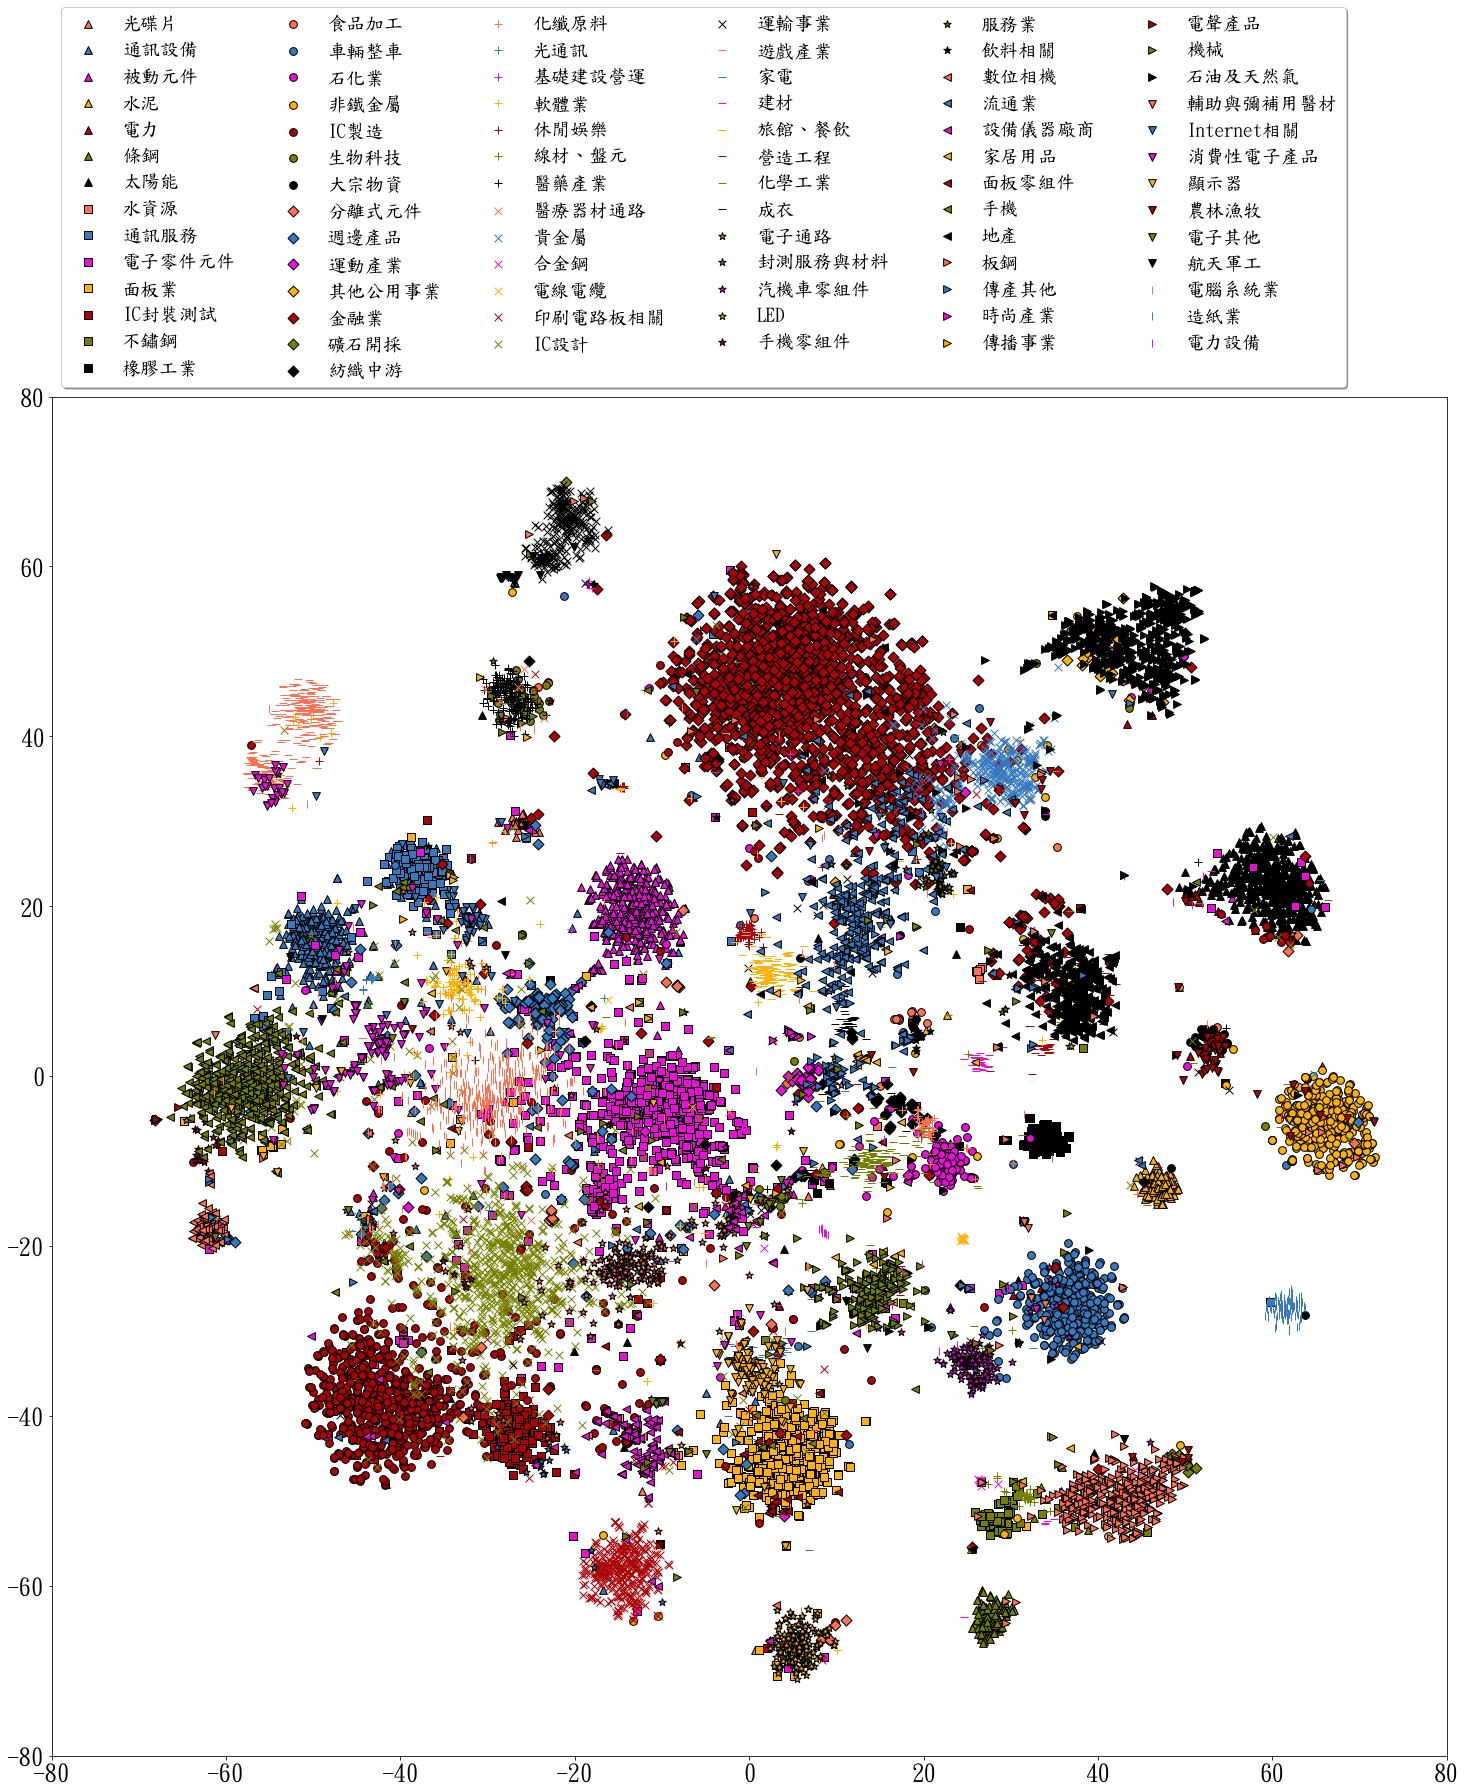

In [23]:
#plot
c=label
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000","0"]
marker=["^","s","o","D","+","x","_","*","<",">","v","|"]
import matplotlib
plt.figure(figsize=(25,25),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=60,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(color))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-80,80))
plt.ylim((-80,80))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("cosine.test.png")

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 <a list of 9 Text yticklabel objects>)

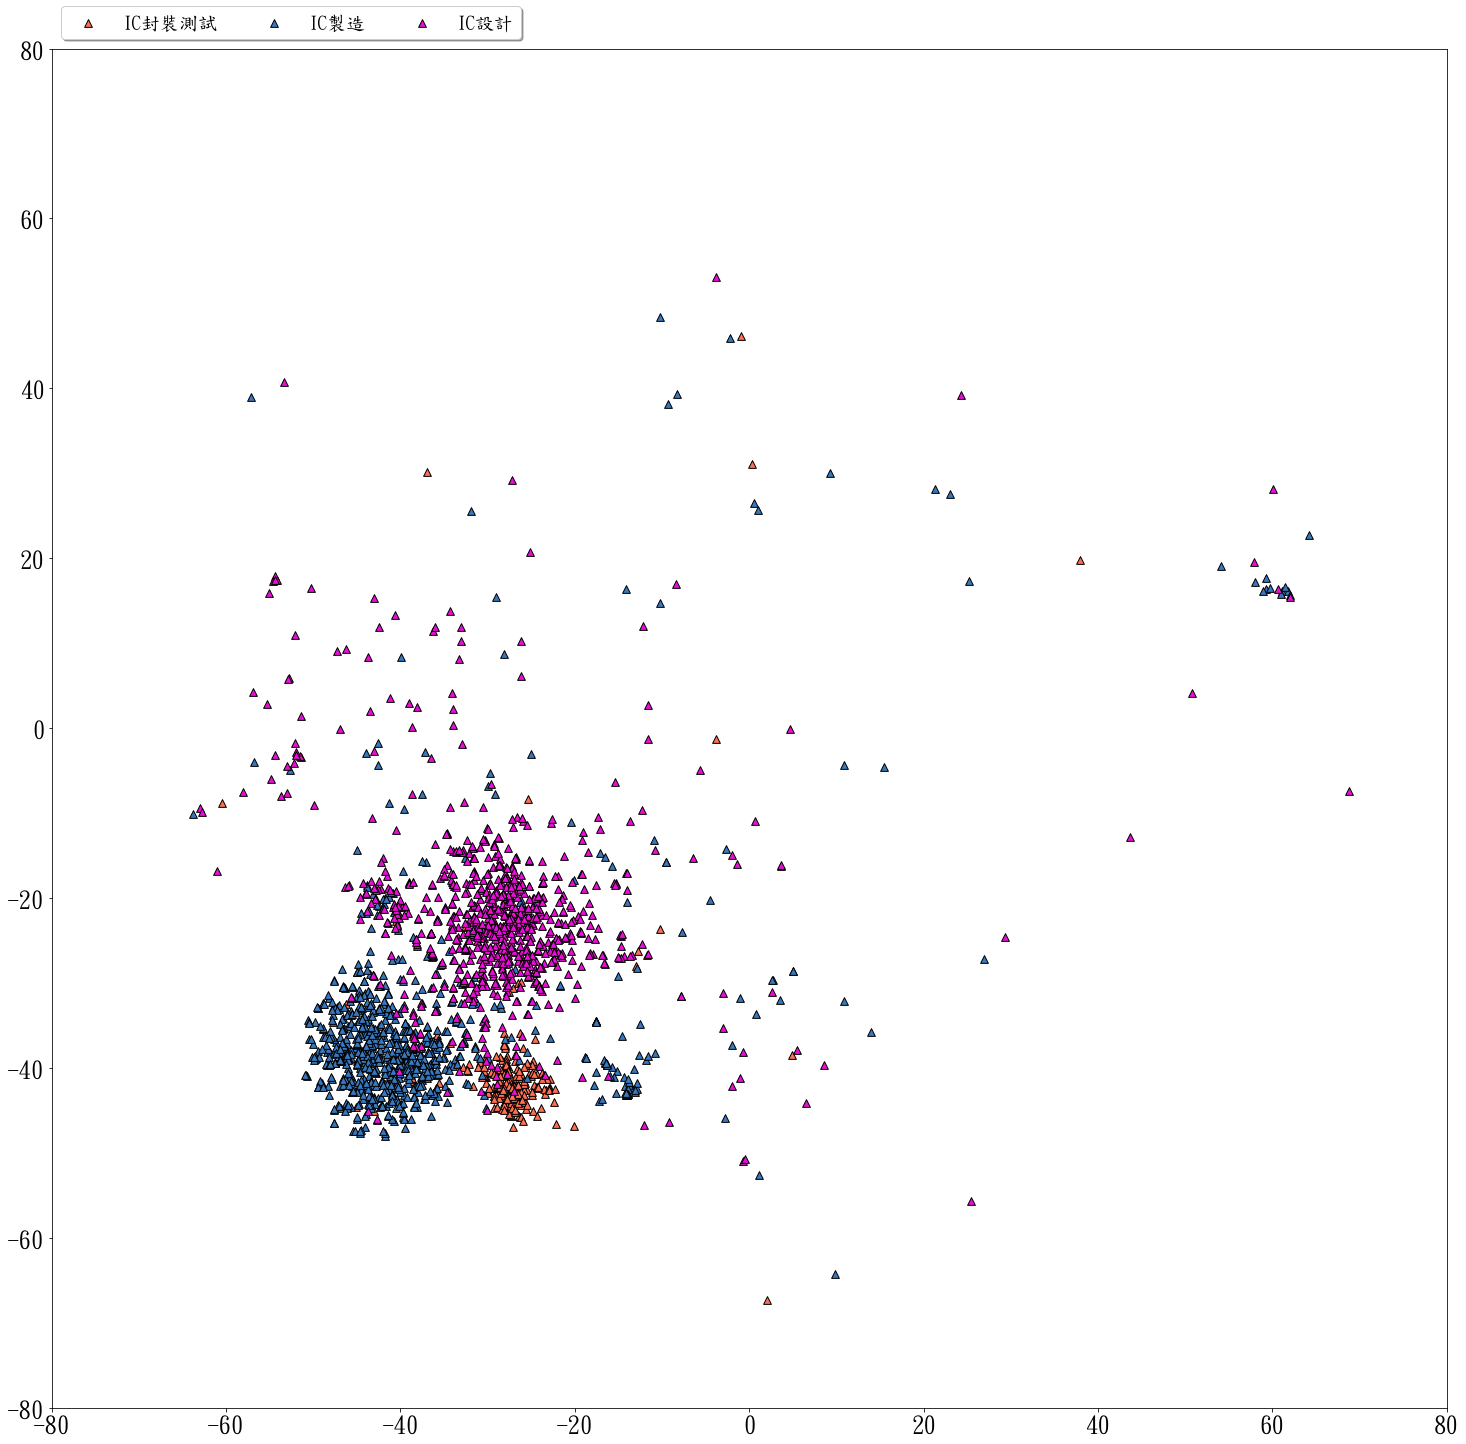

In [30]:
#plot
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000","0"]
marker=["^","s","o","D","+","x","_","*","<",">","v","|"]
import matplotlib
plt.figure(figsize=(25,25),)
for i,k in enumerate(["IC封裝測試","IC製造","IC設計"]):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=60,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(color))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-80,80))
plt.ylim((-80,80))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# plt.savefig("cosine.test.png")

In [ ]:
x=torch.randint(0,5,(100000,100000))

In [169]:
%%time
torch.sum(x*x)

Wall time: 418 ms


tensor(600080867)

In [170]:
%%time
torch.einsum("ij,ij->",x,x)

Wall time: 60.9 ms


tensor(600080867)